In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

**Importing Dataset**

In [ ]:
df = pd.read_csv("/content/LAP_Dataset.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Displaying the information in the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

<Axes: >

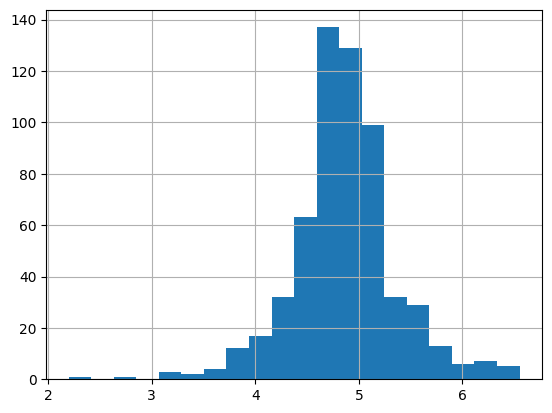

In [ ]:
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

<Axes: >

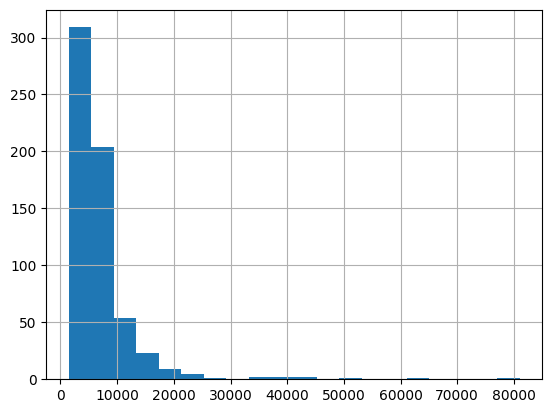

In [ ]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

**Displaying number of null values in each column**

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

**Deleting all rows with null values**

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

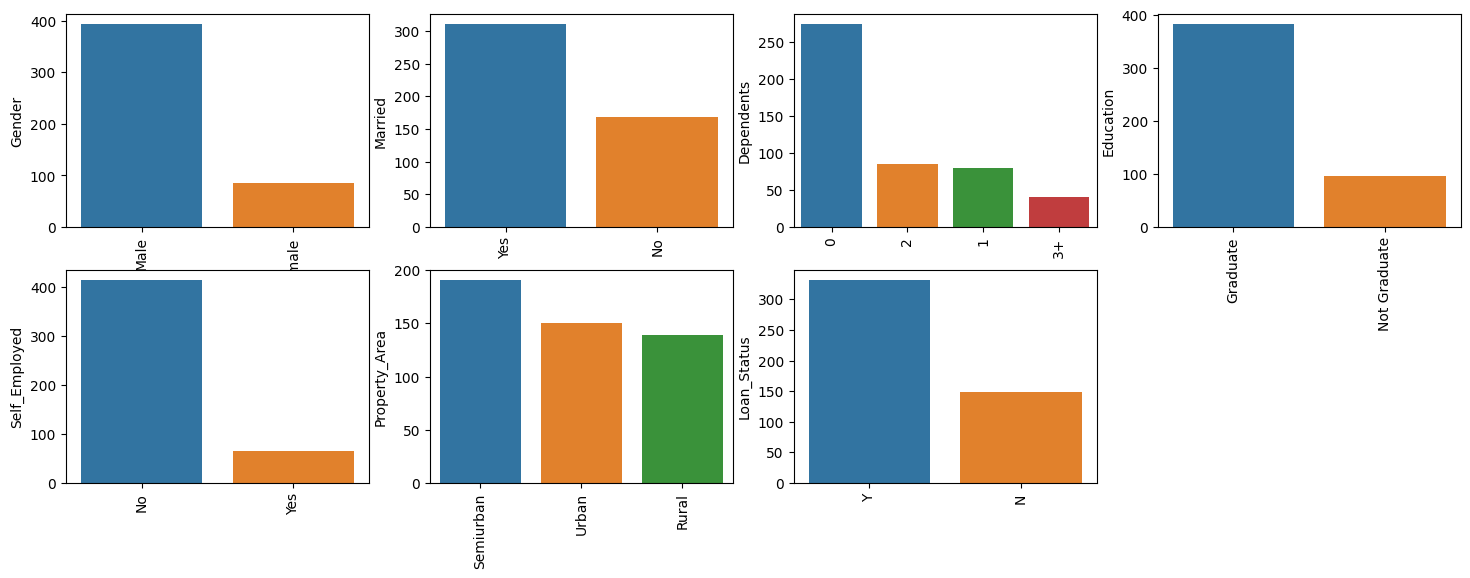

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
  
for col in object_cols:
  y=df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
 12  loanAmount_log     480 non-null    float64
 13  TotalIncome        480 non-null    float64
 14  TotalIncome_log    480 non-null    float64
dtypes: float64(7), int64(1), object(7)
memory usage: 60.0+ KB


In [ ]:
x=df.iloc[:,np.r_[0:4,8:10,12,14]].values
x

array([['Male', 'Yes', '1', ..., 1.0, 4.852030263919617,
        8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425,
        8.006367567650246],
       ['Male', 'Yes', '0', ..., 1.0, 4.787491742782046,
        8.50532301884575],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752,
        9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587,
        8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754,
        8.430109084509125]], dtype=object)

In [ ]:
y=df.iloc[:,11].values
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()

In [ ]:
for i in range(0,5):
  x[:,i]=Labelencoder_x.fit_transform(x[:,i])
x[:,7]=Labelencoder_x.fit_transform(x[:,7])  

x

array([[1, 1, 1, ..., 1.0, 4.852030263919617, 261],
       [1, 1, 0, ..., 1.0, 4.189654742026425, 34],
       [1, 1, 0, ..., 1.0, 4.787491742782046, 185],
       ...,
       [1, 1, 1, ..., 1.0, 5.53338948872752, 338],
       [1, 1, 2, ..., 1.0, 5.231108616854587, 322],
       [0, 0, 0, ..., 0.0, 4.890349128221754, 144]], dtype=object)

In [ ]:
Labelencoder_y=LabelEncoder()
y=Labelencoder_y.fit_transform(y)
y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

**Splitting into training and testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
X_train

array([[1, 0, 0, ..., 1.0, 4.430816798843313, 304],
       [0, 0, 0, ..., 1.0, 4.709530201312334, 91],
       [0, 0, 0, ..., 1.0, 4.382026634673881, 47],
       ...,
       [1, 0, 0, ..., 1.0, 5.497168225293202, 353],
       [1, 1, 0, ..., 1.0, 4.787491742782046, 273],
       [1, 1, 0, ..., 0.0, 4.0943445622221, 7]], dtype=object)

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(X_train,Y_train)
y_pred_rc = rfc.predict(X_test)
print("Accuracy of Random Forest Classifier = ",metrics.accuracy_score(y_pred_rc,Y_test))
print("Precision of Random Forest Classifier = ",metrics.precision_score(y_pred_rc,Y_test))
print("Recall of Random Forest Classifier = ",metrics.recall_score(y_pred_rc,Y_test))
print("F1-Score of Random Forest Classifier = ",metrics.f1_score(y_pred_rc,Y_test))
y_pred_rc

Accuracy of Random Forest Classifier =  0.7638888888888888
Precision of Random Forest Classifier =  0.9157894736842105
Recall of Random Forest Classifier =  0.7699115044247787
F1-Score of Random Forest Classifier =  0.8365384615384616


array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

**CONFUSION MATRIX**

In [ ]:
pd.crosstab(Y_test, y_pred_rc, rownames=[''], colnames=[''], margins=True)

,0,1,All
,,,
0,23,26,49
1,8,87,95
All,31,113,144


# **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
y_pred_dt = dt.predict(X_test)
print("Accuracy of Decision Tree Classifier = ",metrics.accuracy_score(y_pred_dt,Y_test))
print("Precision of Decision Tree  Classifier = ",metrics.precision_score(y_pred_dt,Y_test))
print("Recall of Decision Tree Classifier = ",metrics.recall_score(y_pred_dt,Y_test))
print("F1-Score of Decision Tree  Classifier = ",metrics.f1_score(y_pred_dt,Y_test))
y_pred_dt

Accuracy of Decision Tree Classifier =  0.6597222222222222
Precision of Decision Tree  Classifier =  0.7684210526315789
Recall of Decision Tree Classifier =  0.73
F1-Score of Decision Tree  Classifier =  0.7487179487179486


array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

**CONFUSION MATRIX**

In [ ]:
pd.crosstab(Y_test, y_pred_dt, rownames=[''], colnames=[''], margins=True)

,0,1,All
,,,
0,24,25,49
1,28,67,95
All,52,92,144


# **K-NEAREST NEIGHBORS CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train,Y_train) 
y_pred_kn = kn.predict(X_test)
print("Accuracy of K-Neighbors Classifier = ",metrics.accuracy_score(y_pred_kn,Y_test))
print("Precision of K-Neighbors Classifier = ",metrics.precision_score(y_pred_kn,Y_test))
print("Recall of K-Neighbors Classifier = ",metrics.recall_score(y_pred_rc,Y_test))
print("F1-Score of K-Neighbors Classifier = ",metrics.f1_score(y_pred_kn,Y_test))
y_pred_kn

Accuracy of K-Neighbors Classifier =  0.6527777777777778
Precision of K-Neighbors Classifier =  0.8631578947368421
Recall of K-Neighbors Classifier =  0.7652173913043478
F1-Score of K-Neighbors Classifier =  0.7663551401869159


array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

**CONFUSION MATRIX**

In [ ]:
pd.crosstab(Y_test, y_pred_kn, rownames=[''], colnames=[''], margins=True)

,0,1,All
,,,
0,12,37,49
1,13,82,95
All,25,119,144


# **SUPPORT VECTOR CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train) 
y_pred_svc = svc.predict(X_test)
print("Accuracy of Support Vector Classifier = ",metrics.accuracy_score(y_pred_svc,Y_test))
print("Precision of Support Vector Classifier = ",metrics.precision_score(y_pred_svc,Y_test))
print("Recall of Support Vector Classifier = ",metrics.recall_score(y_pred_svc,Y_test))
print("F1-Score of Support Vector Classifier = ",metrics.f1_score(y_pred_svc,Y_test))
y_pred_svc

Accuracy of Support Vector Classifier =  0.6597222222222222
Precision of Support Vector Classifier =  1.0
Recall of Support Vector Classifier =  0.6597222222222222
F1-Score of Support Vector Classifier =  0.7949790794979079


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**CONFUSION MATRIX**

In [ ]:
pd.crosstab(Y_test, y_pred_svc, rownames=[''], colnames=[''], margins=True)

,1,All
,,
0,49,49
1,95,95
All,144,144
